# Computer Vision Homework 1 
 
This assignment is due on Jul 13, at 11:59 PM EST.  
Finish the following programming problems and submit your scripts to BBLearn. You can zip all the data and files for 
submission.  
Install the Python packages needed by 
* pip install -r requirement.txt 
Here are some useful resources: 
* Python  basics  https://pythonbasics.org/ 
* Numpy https://numpy.org/doc/stable/user/basics.html 
* OpenCV  https://docs.opencv.org/4.x/d6/d00/tutorial_py_root.html 




## Problem 1 
(4 points) 2D Transformations. 
Create the transform() function in image_transformations.py. The function takes an image,
a 2D transformation 𝑇 , a 3 × 3 matrix, as input, and outputs a transformed image according to the 
transformation 𝑇 . 
After your implementation, run the image_transformations.py in Python to verify it. Figure 1 
shows an example of running the script. 

In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt


In [9]:
from scipy import ndimage # Roberts Cross Operator


To perform a 2D transformation like rotation, translation, or scaling on an image:
- Get the dimensions of the image using the shape method.
- 2D transformations are represented as 3x3 matr
create coordinate matrices for all pixels




In [2]:

# Load image
image = cv2.imread('pexels-nui-malama-169330637-31188110.jpg')  # Load your image here


In [3]:

# Get the dimensions of the input image
h, w = image.shape[:2]
print(f"Image dimensions: {h}x{w}")

# Create coordinate matrices for all pixels
x, y = np.meshgrid(np.arange(w), np.arange(h))

# Convert to homogeneous coordinates [x, y, 1]
coords = np.stack([x.ravel(), y.ravel(), np.ones_like(x.ravel())])

T = np.array([[1, 0, 50], [0, 1, 30], [0, 0, 1]])  # Identity transformation for testing

# Apply transformation: T * coords
transformed_coords = T @ coords
print(f"coords first five: {coords[:,:5]}")
print(f"Transformed coordinates (first 5): {transformed_coords[:, :5]}")

# Convert back to Cartesian coordinates
transformed_x = transformed_coords[0] / transformed_coords[2]
transformed_y = transformed_coords[1] / transformed_coords[2]

print(f"Transformed coordinates (first 5): {transformed_x[:5]}, {transformed_y[:5]}")

# Calculate output image bounds
min_x, max_x = int(np.floor(transformed_x.min())), int(np.ceil(transformed_x.max()))
min_y, max_y = int(np.floor(transformed_y.min())), int(np.ceil(transformed_y.max()))
    
print(f"Output image bounds: x({min_x}, {max_x}), y({min_y}, {max_y})")

# Create output image
output_width = max_x - min_x + 1
output_height = max_y - min_y + 1



Image dimensions: 6720x4480
coords first five: [[0 1 2 3 4]
 [0 0 0 0 0]
 [1 1 1 1 1]]
Transformed coordinates (first 5): [[50 51 52 53 54]
 [30 30 30 30 30]
 [ 1  1  1  1  1]]
Transformed coordinates (first 5): [50. 51. 52. 53. 54.], [30. 30. 30. 30. 30.]
Output image bounds: x(50, 4529), y(30, 6749)


In [4]:
# Initialize output image with zeros
if len(image.shape) == 3:
    output_image = np.zeros((output_height, output_width, image.shape[2]), dtype=image.dtype)
else:
    output_image = np.zeros((output_height, output_width), dtype=image.dtype)
    
# Map transformed coordinates to output image
output_x = (transformed_x - min_x).astype(int)
output_y = (transformed_y - min_y).astype(int)

# Filter valid coordinates
valid_mask = (output_x >= 0) & (output_x < output_width) & (output_y >= 0) & (output_y < output_height)
    
# Apply transformation using nearest neighbor interpolation
if len(image.shape) == 3:
    for c in range(image.shape[2]):
        output_image[output_y[valid_mask], output_x[valid_mask], c] = image[y.ravel()[valid_mask], x.ravel()[valid_mask], c]
else:
    output_image[output_y[valid_mask], output_x[valid_mask]] = image[y.ravel()[valid_mask], x.ravel()[valid_mask]]
    


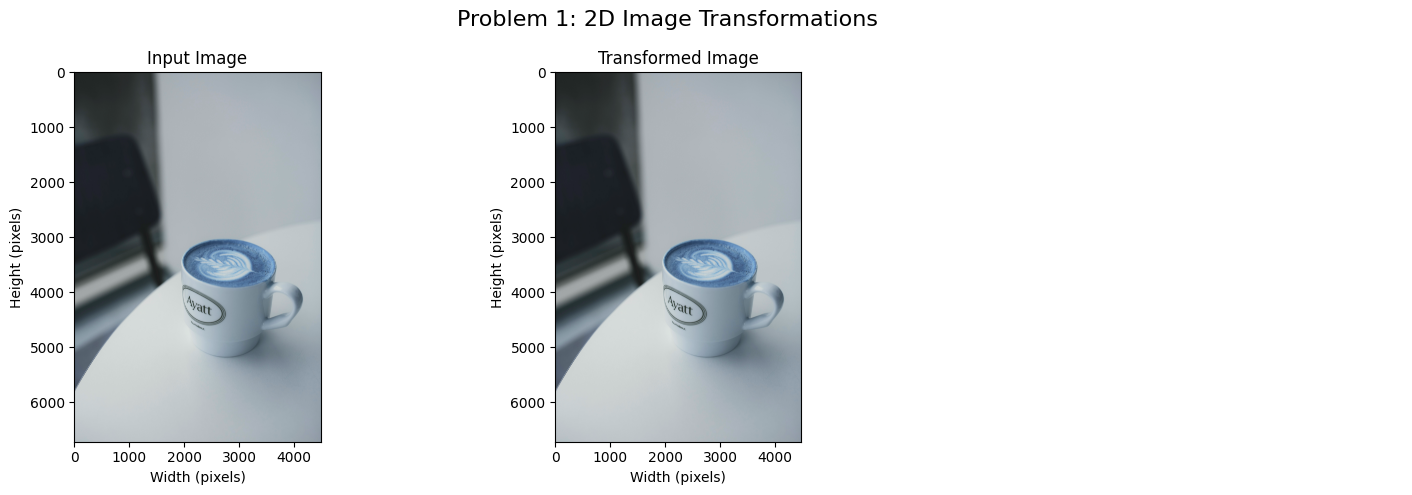

In [5]:
results = [("Input Image", image),
           ("Transformed Image", output_image)]

# Display input image and output image after transformation as a figure
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
for i, (title, img) in enumerate(results):
    axes[i].imshow(img, cmap='gray')
    axes[i].set_title(title)
    axes[i].set_xlabel("Width (pixels)")
    axes[i].set_ylabel("Height (pixels)")

# Turn off any unused subplot axes
for j in range(len(results), 3):  # 1x3 = 3 subplots
    axes[j].axis('off')

plt.suptitle("Problem 1: 2D Image Transformations", fontsize=16)
plt.tight_layout()
plt.show()

 
 
Figure 1: Image transformations. 
 
## Problem 2 
 
2.1 Apply these functions on given image  
 
i. Averaging Kernel (3×3and 5×5) 



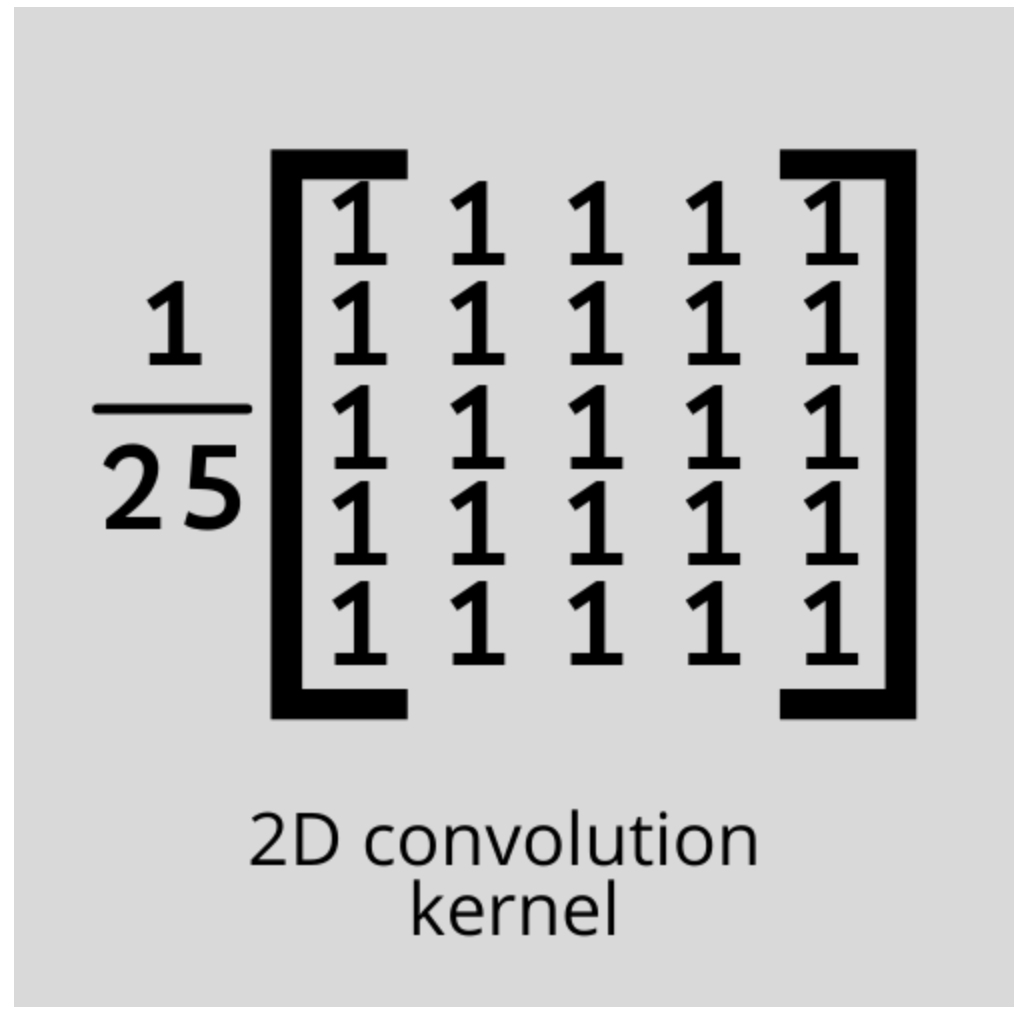
Image Citation: https://www.geeksforgeeks.org/python/python-opencv-smoothing-and-blurring/

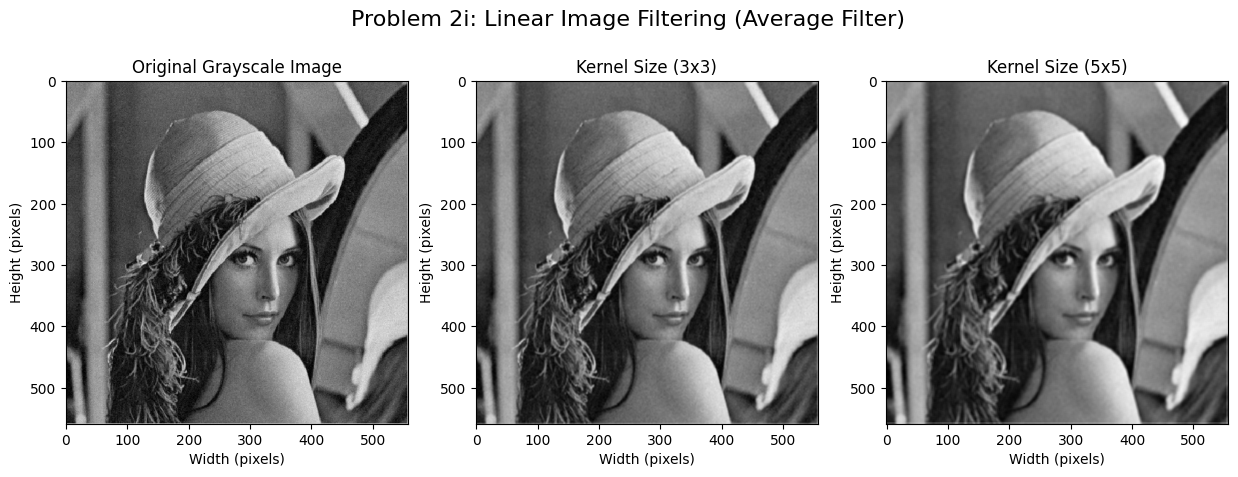

In [6]:
# Load image to apply Filters
grayscale_image = cv2.imread("a-Noisy-Lena-image-with-low-level-Gaussian-noise-variance-0001-mean-0-b-The.ppm(1).png", cv2.IMREAD_GRAYSCALE)

# Use existing Averaging filter function in cv2 to linearly filter the grayscale image
blurred_3 = cv2.blur(grayscale_image, (3, 3))
blurred_5 = cv2.blur(grayscale_image, (5, 5))

# Display results 
filter_results_i = [("Original Grayscale Image", grayscale_image),
           ("Kernel Size (3x3)", blurred_3),
           ("Kernel Size (5x5)", blurred_5)]

fig, axes = plt.subplots(1, 3, figsize=(15, 5))
for i, (title, img) in enumerate(filter_results_i):
    axes[i].imshow(img, cmap='gray')
    axes[i].set_title(title)
    axes[i].set_xlabel("Width (pixels)")
    axes[i].set_ylabel("Height (pixels)")
    
plt.suptitle("Problem 2i: Linear Image Filtering (Average Filter)", fontsize=16)
plt.show()


ii. Gaussian Kernel (σ =1,2,3) Use (3σ +1)×(3σ +1) as size of Kernel  
So the kernel size is 4x4, 7x7, and 10x10 for σ =1,2,3 respectively.
Works by convolving over the image with the kernel in the following image.
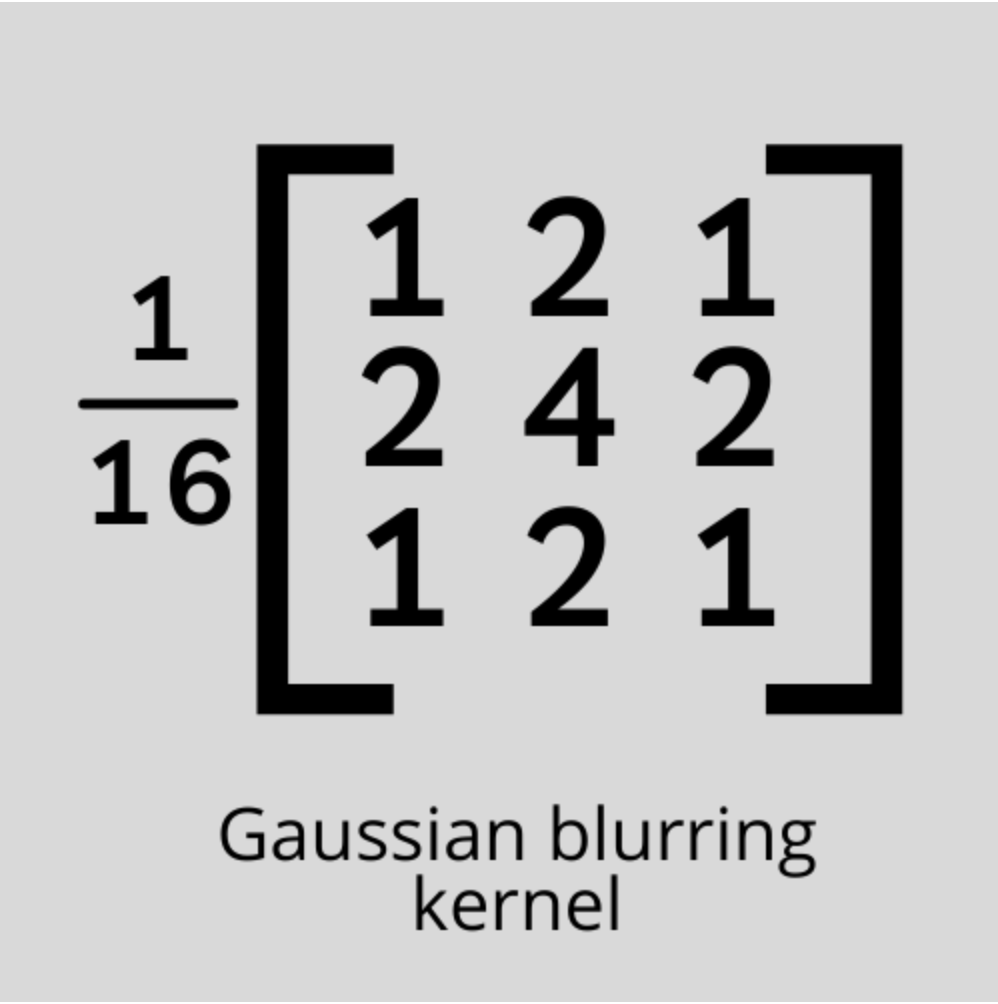
Image Citation: https://docs.opencv.org/4.x/d4/d86/group__imgproc__filter.html#gae8bdcd9154ed5ca3cbc1766d960f45c1

I tried following the instructions to use kernel sizes based on the sigma of in the equation (3σ +1)×(3σ +1), where σ = 1,2, and 3. But it seems like the built-in function cv2.GaussianBlur() does not accept even kernel sizes.
So I used the next odd number for the kernel size. For example, for σ = 1, the kernel size is 4x4, but I used 5x5 instead and for σ = 3, the kernel size is 10x10, but I used 11x11 instead. 

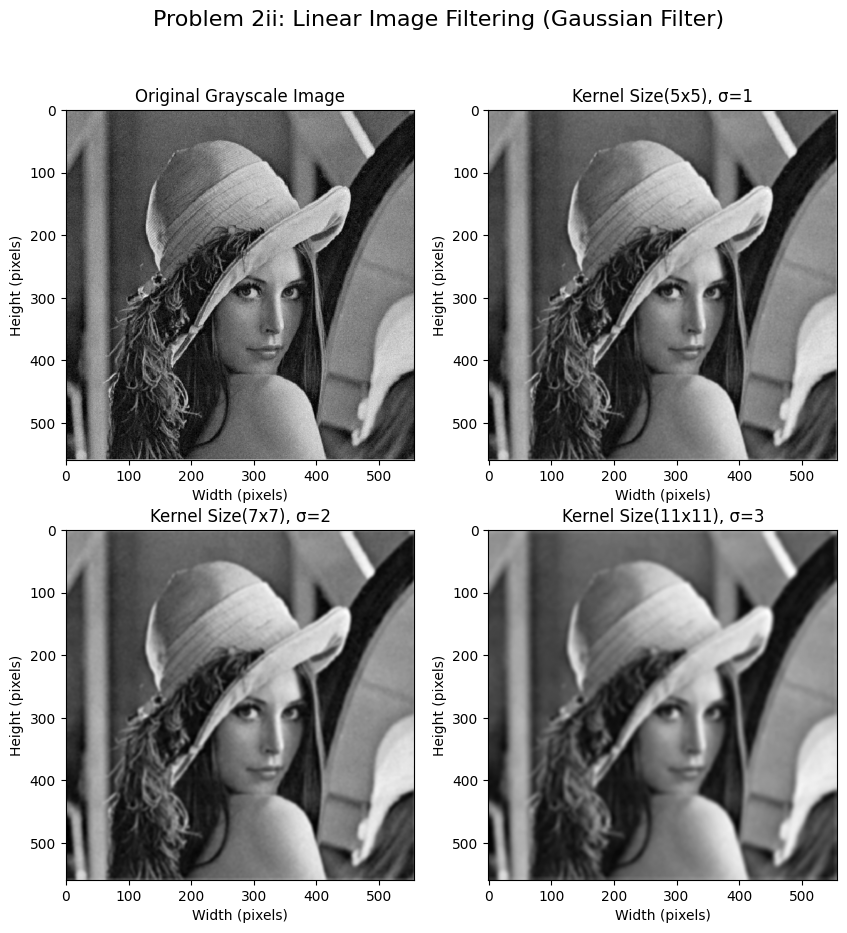

In [17]:
# Apply Gaussian Blur with different kernel sizes
gauss_1 = cv2.GaussianBlur(grayscale_image, (5, 5), 1)
gauss_2 = cv2.GaussianBlur(grayscale_image, (7, 7), 2)
gauss_3 = cv2.GaussianBlur(grayscale_image, (11, 11), 3)

# Display results
filter_results_ii = [("Original Grayscale Image", grayscale_image),
           ("Kernel Size(5x5), σ=1", gauss_1),
           ("Kernel Size(7x7), σ=2", gauss_2),
           ("Kernel Size(11x11), σ=3", gauss_3)]

fig, axes = plt.subplots(2, 2, figsize=(10, 10))
for i, (title, img) in enumerate(filter_results_ii):
    axes[i // 2, i % 2].imshow(img, cmap='gray')
    axes[i // 2, i % 2].set_title(title)
    axes[i // 2, i % 2].set_xlabel("Width (pixels)")
    axes[i // 2, i % 2].set_ylabel("Height (pixels)")

plt.suptitle("Problem 2ii: Linear Image Filtering (Gaussian Filter)", fontsize=16)
plt.show()


iii. Roberts Edge Operators :
The Roberts Cross Operator performs a simple 2-D spatial gradient operation by using a pair of 2x2 convolution kernels. These kernels are applied to the image to highlight edges in the diagonal directions. The operator is defined as follows:

$$ G_x = \begin{bmatrix} 1 & 0 \\ 0 & -1 \end{bmatrix} \quad G_y = \begin{bmatrix} 0 & 1 \\ -1 & 0 \end{bmatrix} $$

The gradient magnitude is then computed as:

$$ G = \sqrt{G_x^2 + G_y^2} $$

This operator is particularly sensitive to edges that are oriented at 45 degrees to the pixel grid.

Summary of how the Operator works from: https://www.geeksforgeeks.org/python/python-opencv-roberts-edge-detection/

I followed implementation instructions found on: https://www.geeksforgeeks.org/python/python-opencv-roberts-edge-detection/


In [15]:
# Create Roberts Cross Operator kernels
roberts_cross_vert = np.array([[1, 0], [0, -1]])
roberts_cross_horz = np.array([[0, 1], [-1, 0]])

# Load image to apply Roberts Cross Operator
robcross_image = cv2.imread('pexels-jimmykphotos-32954778.jpg').astype('float32')  # Load your image here
robcross_grayimage = cv2.cvtColor(robcross_image, cv2.COLOR_BGR2GRAY)
robcross_grayimage/= 255.0  # Normalize to [0, 1] range

# Apply Roberts Cross Operator
vertical = ndimage.convolve(robcross_grayimage, roberts_cross_vert)
horizontal = ndimage.convolve(robcross_grayimage, roberts_cross_horz)

# Calculate the magnitude of the gradient
roberts = np.sqrt(np.square(vertical) + np.square(horizontal))
roberts*= 255.0 # Scale back to [0, 255] range


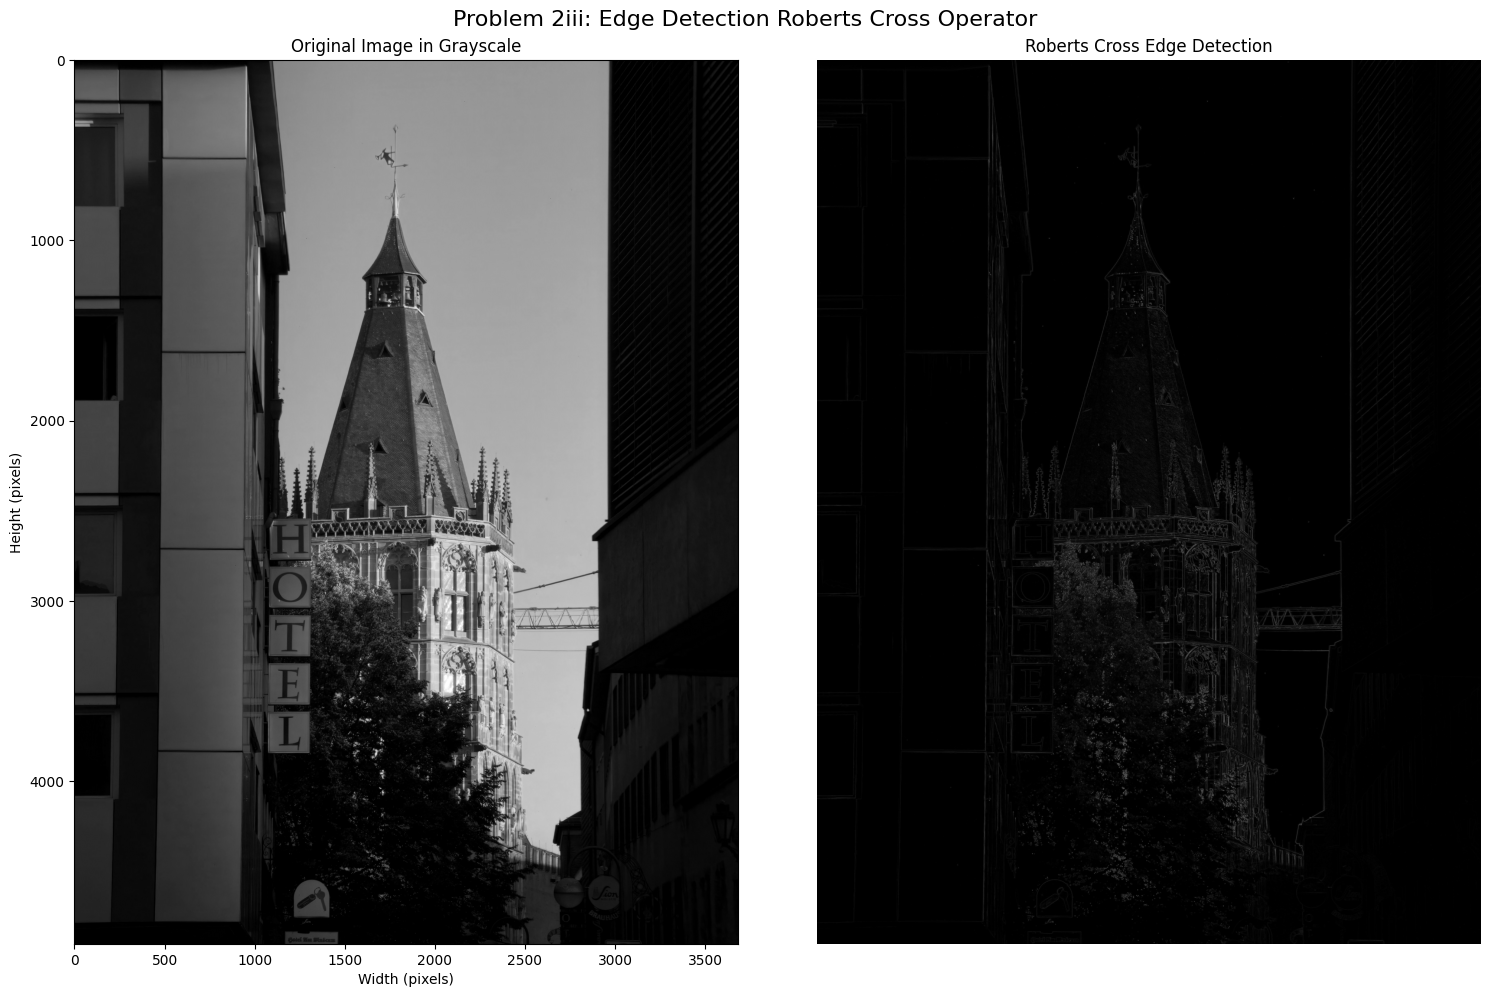

In [30]:
# Display results
results = [("Original Image in Grayscale", robcross_grayimage),
           ("Roberts Cross Edge Detection", roberts)]

fig, axes = plt.subplots(1, 2, figsize=(15, 10))
for i, (title, img) in enumerate(results):
    axes[i].imshow(img, cmap='gray')
    axes[i].set_title(title)
    axes[i].set_xlabel("Width (pixels)")
    axes[i].set_ylabel("Height (pixels)")

plt.suptitle("Problem 2iii: Edge Detection Roberts Cross Operator", fontsize=16)
plt.tight_layout()
plt.axis('off')
plt.show()


iv. Sobel Edge Operators: Using built-in function

The Sobel operators are a joint Gaussian smoothing with a differentiation operation that makes it more resistant to noise.
The direction of the gradient (vertical or horizontal) can be specified. Kernl size can also be specified


v. Prewitt Edge Operators  
 
2. Write a function GaussianPyramids that produces n levels of gaussian pyramid for image I.  
3. Write a function LaplacianPyramids that produces n levels of Laplacian pyramid of image I.  
 
 
## Problem 3  
 
Camera Calibration with Harris Corner Detection 
Objective: 
The aim of this assignment is to use Harris Corner Detection to identify corner points from a checkerboard 
pattern  for  camera  calibration.  Students  will  extract  3D  and  2D  points,  and  then  calculate  the 
camera's intrinsic and extrinsic parameters by following the methodology outlined in Lecture 2 slides. 
 
 
Instructions: 
Step 1: Setup 
1.  Print or use a pre-existing checkerboard pattern with known square dimensions (e.g., 25mm x 25mm 3  per square). 



2.  Place the checkerboard in a room setting at different positions and orientations. Ensure the pattern is 
fully visible in each image. 



3.  Capture  at  least 5 images of  the  checkerboard  from  different  perspectives  using  a  smartphone  or 
camera. Make sure the camera remains fixed between shots. 
 
 
Step 2: Harris Corner Detection 
1.  Detect Corners: 
o Use the Harris Corner Detection algorithm to find corner points on the checkerboard in each 
captured image. 
o Highlight the detected corners on the image for visualization. 
o Refine  the  corner  points  using sub-pixel  corner  detection (e.g., cv2.cornerSubPix in 
OpenCV). 
2.  Select Corresponding Points: 
o Identify the corresponding 3D world points for each detected corner. Assume: 
§ The checkerboard lies on the z=0 plane. 
§ The top-left corner of the checkerboard is the origin (0,0,0). 
§ Each square's size is known (e.g., 25mm). 
o Pair the detected 2D image points (from Harris Corner Detection) with their respective 3D 
world points. 
 
Step 3: Camera Calibration 
1.  Intrinsic and Extrinsic Parameters: 
o Use  the Lecture  2  slides to  calculate  the  camera’s intrinsic  parameters (focal  length, 
principal point, and skew) and extrinsic parameters (rotation and translation matrices). 
o Perform these calculations programmatically using a library like OpenCV or manually in 
Python based on the formulas provided in the lecture. 
o Derive the intrinsic matrix K and the extrinsic parameters [R∣t] for each image. 
 
Step 4: Evaluate and Verify 
1.  Reprojection: 
o Reproject the 3D points onto the image plane using the calculated parameters. 
o Compare  the  reprojected  points  with  the  original  detected  2D  points  from  Harris  Corner 
Detection. 
2.  Reprojection Error: 
o Calculate the reprojection error to evaluate the accuracy of your calibration. 
 
 
Deliverables 
1.  Images and Detected Corners: 
o Include the original images with the Harris-detected corners clearly highlighted. Ensure the 
visualization is clear, using markers (e.g., circles, squares) to show the detected corners. 
2.  Camera Parameters: 
o Provide the calculated Intrinsic Parameters, including: 
o Provide the Extrinsic Parameters for each image: 
3.  Reprojection Error: 
o Report the reprojection error calculated during the calibration process. 
